In [ ]:
import config
import stats
from simulate import simulate
import random

def format_time(minutes):
    h = int(minutes // 60)
    m = int(minutes % 60)
    s = int((minutes - int(minutes)) * 60)
    return f"{h}h {m}m {s}s"
    
def reset_statistics():
    stats.delays_type1.clear()
    stats.delays_type2.clear()
    stats.waiting_times_type1.clear()
    stats.waiting_times_type2.clear()
    stats.area_num_in_queue_type1 = 0.0
    stats.area_num_in_queue_type2 = 0.0
    stats.area_num_in_system_type1 = 0.0
    stats.area_num_in_system_type2 = 0.0

def run_simulation(n=100, serversA=2, serversB=1, print_stats=True):
    results = []

    for seed in range(n):
        config.NUM_SERVERS_A = serversA
        config.NUM_SERVERS_B = serversB
        random.seed(seed)
        reset_statistics()
        simulate(print_stats=print_stats)
        dict_stats = {
            "delay1": sum(stats.delays_type1) / len(stats.delays_type1) if stats.delays_type1 else 0,
            "delay2": sum(stats.delays_type2) / len(stats.delays_type2) if stats.delays_type2 else 0,
            "waiting1": sum(stats.waiting_times_type1) / len(stats.waiting_times_type1) if stats.waiting_times_type1 else 0,
            "waiting2": sum(stats.waiting_times_type2) / len(stats.waiting_times_type2) if stats.waiting_times_type2 else 0,
            "queue1": stats.area_num_in_queue_type1 / config.SIM_TIME,
            "queue2": stats.area_num_in_queue_type2 / config.SIM_TIME,
            "system1": stats.area_num_in_system_type1 / config.SIM_TIME,
            "system2": stats.area_num_in_system_type2 / config.SIM_TIME,
        }
        
        for i in range(len(stats.server_A_time_type1)):
            key_A1 = f"utilA{i+1}_type1"
            key_A2 = f"utilA{i+1}_type2"
            dict_stats[key_A1] = 100 * stats.server_A_time_type1[i] / config.SIM_TIME
            dict_stats[key_A2] = 100 * stats.server_A_time_type2[i] / config.SIM_TIME

        for i in range(len(stats.server_B_time_type1)):
            key_B1 = f"utilB{i+1}_type1"
            key_B2 = f"utilB{i+1}_type2"
            dict_stats[key_B1] = 100 * stats.server_B_time_type1[i] / config.SIM_TIME
            dict_stats[key_B2] = 100 * stats.server_B_time_type2[i] / config.SIM_TIME

        results.append(dict_stats)

    return results

## Resultados com parâmetros do enunciado

In [6]:
result = run_simulation(print_stats=False)

print(f"Average delay for type 1: {format_time(sum(r['delay1'] for r in result) / len(result))}")
print(f"Average delay for type 2: {format_time(sum(r['delay2'] for r in result) / len(result))}")
print(f"Average waiting time for type 1: {format_time(sum(r['waiting1'] for r in result) / len(result))}")
print(f"Average waiting time for type 2: {format_time(sum(r['waiting2'] for r in result) / len(result))}")
print(f"Average number in queue for type 1: {sum(r['queue1'] for r in result) / len(result):.2f}")
print(f"Average number in queue for type 2: {sum(r['queue2'] for r in result) / len(result):.2f}")
print(f"Average number in system for type 1: {sum(r['system1'] for r in result) / len(result):.2f}")
print(f"Average number in system for type 2: {sum(r['system2'] for r in result) / len(result):.2f}")
for i in range(1, config.NUM_SERVERS_A + 1):
    util_A1 = sum(r[f'utilA{i}_type1'] for r in result) / len(result)
    util_A2 = sum(r[f'utilA{i}_type2'] for r in result) / len(result)
    print(f"Average utilization of server A{i} for type 1: {util_A1:.2f}%")
    print(f"Average utilization of server A{i} for type 2: {util_A2:.2f}%")
for i in range(1, config.NUM_SERVERS_B + 1):
    util_B1 = sum(r[f'utilB{i}_type1'] for r in result) / len(result)
    util_B2 = sum(r[f'utilB{i}_type2'] for r in result) / len(result)
    print(f"Average utilization of server B{i} for type 1: {util_B1:.2f}%")
    print(f"Average utilization of server B{i} for type 2: {util_B2:.2f}%")

Average delay for type 1: 0h 0m 21s
Average delay for type 2: 0h 0m 37s
Average waiting time for type 1: 0h 1m 10s
Average waiting time for type 2: 0h 1m 13s
Average number in queue for type 1: 0.02
Average number in queue for type 2: 0.03
Average number in system for type 1: 0.66
Average number in system for type 2: 0.15
Average utilization of server A1 for type 1: 37.25%
Average utilization of server A1 for type 2: 8.25%
Average utilization of server A2 for type 1: 20.72%
Average utilization of server A2 for type 2: 3.83%
Average utilization of server B1 for type 1: 6.08%
Average utilization of server B1 for type 2: 12.08%


## Comparação: 2A+1B vs. 3A+1B vs. 2A+2B

In [7]:
result_2A1B = run_simulation(print_stats=False)
result_3A1B = run_simulation(serversA=3, serversB=1, print_stats=False)
result_2A2B = run_simulation(serversA=2, serversB=2, print_stats=False)

## Comparação visual dos delays médios

Total combined maximum delay (Type 1) - 2A+1B/3A+1B + 2A+1B/2A+2B: 1.263 min
Total combined maximum delay (Type 2) - 2A+1B/3A+1B + 2A+1B/2A+2B: 2.001 min


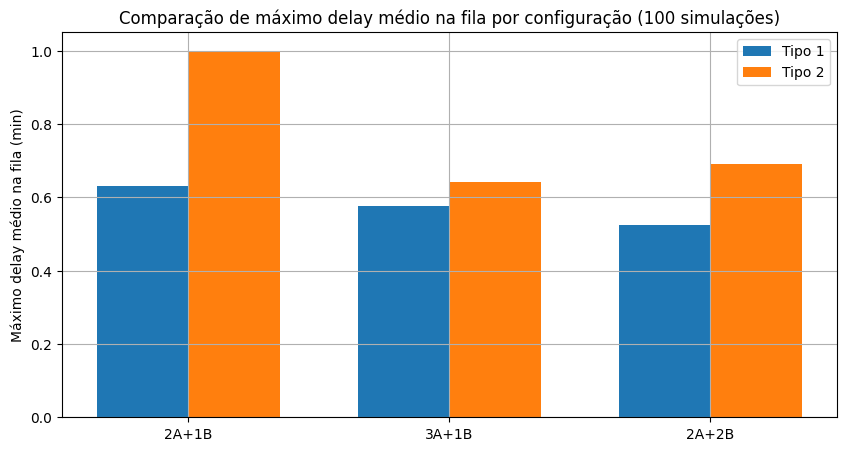

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max_delay1_2A1B = np.max([r["delay1"] for r in result_2A1B])
max_delay1_3A1B = np.max([r["delay1"] for r in result_3A1B])
max_delay1_2A2B = np.max([r["delay1"] for r in result_2A2B])

max_delay2_2A1B = np.max([r["delay2"] for r in result_2A1B])
max_delay2_3A1B = np.max([r["delay2"] for r in result_3A1B])
max_delay2_2A2B = np.max([r["delay2"] for r in result_2A2B])

max_delay1_1 = np.max([max_delay1_2A1B, max_delay1_3A1B])
max_delay2_1 = np.max([max_delay2_2A1B, max_delay2_3A1B])
max_delay1_2 = np.max([max_delay1_2A1B, max_delay1_2A2B])
max_delay2_2 = np.max([max_delay2_2A1B, max_delay2_2A2B])

total_max_delay_type1 = sum([max_delay1_1, max_delay1_2])
total_max_delay_type2 = sum([max_delay2_1, max_delay2_2])

print(f"Total combined maximum delay (Type 1) - 2A+1B/3A+1B + 2A+1B/2A+2B: {total_max_delay_type1:.3f} min")
print(f"Total combined maximum delay (Type 2) - 2A+1B/3A+1B + 2A+1B/2A+2B: {total_max_delay_type2:.3f} min")

labels = ["2A+1B", "3A+1B", "2A+2B"]
delays1 = [max_delay1_2A1B, max_delay1_3A1B, max_delay1_2A2B]
delays2 = [max_delay2_2A1B, max_delay2_3A1B, max_delay2_2A2B]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, delays1, width, label="Tipo 1")
plt.bar(x + width/2, delays2, width, label="Tipo 2")

plt.xticks(x, labels)
plt.ylabel("Máximo delay médio na fila (min)")
plt.title("Comparação de máximo delay médio na fila por configuração (100 simulações)")
plt.legend()
plt.grid(True)
plt.show()